# EDA 1 | Parte 2 - Análise dos Títulos dos Hinos da ICM
Este notebook explora os títulos dos hinos presentes na coletânea principal da Igreja Cristã Maranata.

O objetivo é analisar padrões, tamanhos, e variações nos títulos e subtítulos, facilitando estudos sobre organização e identificação dos louvores.

---
**Conteúdo do notebook:**
- Carregamento dos dados tratados na etapa anterior
- Extração e limpeza dos títulos e subtítulos
- Análise dos tamanhos dos títulos
- Criação de DataFrame para títulos e subtítulos
- Visualização dos maiores e menores títulos

---

**A seguir:** Carregamento do DataFrame com os dados dos hinos, previamente tratados e salvos na etapa anterior.

In [1]:
# --- Carregamento dos dados dos hinos tratados ---
import pandas as pd
from pathlib import Path

# Define a pasta de assets e carrega o DataFrame dos hinos
assets_folder = Path("../assets")
hinos_analise: pd.DataFrame = pd.read_pickle(assets_folder / "hinos_analise.pkl")
hinos_analise = hinos_analise.set_index("numero")

# Exibe os primeiros registros para conferência
hinos_analise.head()

,nome,texto,texto_limpo,categoria_id,categoria
numero,,,,,
0,AQUILO QUE FUI NÃO SOU MAIS,"AQUILO QUE FUI NÃO SOU MAIS,\nNEM SOU TUDO O Q...","AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QU...",1,CLAMOR
1,O SANGUE DE JESUS TEM PODER,"O SANGUE DE JESUS TEM PODER,\nPODER QUE A MIM ...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR
2,O SANGUE DE JESUS TEM PODER PARA SALVAR,O SANGUE DE JESUS TEM PODER (2x)\nO SANGUE DE ...,"O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS,...",1,CLAMOR
3,CLAMO A TI,"CLAMO A TI, Ó MEU SENHOR,\nCLAMO A TI, MEU SAL...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR
4,QUANDO TE PROSTRARES,"QUANDO TE PROSTRARES DIANTE DE DEUS,\nLEMBRA Q...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR


---

**A seguir:** Extração dos subtítulos presentes entre parênteses e limpeza dos títulos, separando o nome principal do subtítulo para análise detalhada.

In [2]:
# --- Extração e limpeza dos subtítulos dos hinos ---
cols_int = ["nome", "subtitulo"]
# Extrai subtítulos entre parênteses e limpa a coluna "nome"
hinos_analise["subtitulo"] = (
    hinos_analise["nome"].str.extract(r"\((.*?)\)").squeeze().str.strip()
)
hinos_analise["nome"] = hinos_analise["nome"].str.replace(
    r"\s*\(.*?\)\s*", "", regex=True
)

# Exibe hinos que possuem subtítulo
hinos_analise[~hinos_analise["subtitulo"].isna()][cols_int].head()

,nome,subtitulo
numero,,
118,"Ó SENHOR, DEUS DE ISRAEL",EDIFIQUEI UMA CASA
185,"JESUS, SENHOR, ME CHEGO A TI",EU VENHO COMO ESTOU
197,HOJE QUERO SOMENTE AGRADECER,SOMENTE AGRADECER
252,SE DISPUSERES O TEU CORAÇÃO,JÓ 11:13-19
255,MEU CORAÇÃO ENGRANDECE,CÂNTICO DE VITÓRIA


---

**A seguir:** Cálculo do tamanho dos títulos (sem subtítulo) e exibição dos 10 maiores e 10 menores títulos para identificar padrões e curiosidades.

In [3]:
# --- Análise dos tamanhos dos títulos (sem subtítulo) ---
# Calcula o tamanho real dos títulos
hinos_analise["titulo_tam_real"] = hinos_analise["nome"].str.len()

# Exibe os 10 maiores e 10 menores títulos
print("Top 10 maiores títulos")
display(hinos_analise[[*cols_int, "titulo_tam_real"]].sort_values(by="titulo_tam_real", ascending=False).head(10))
print("Top 10 menores títulos")
display(hinos_analise[[*cols_int, "titulo_tam_real"]].sort_values(by="titulo_tam_real").head(10))

Top 10 maiores títulos


,nome,subtitulo,titulo_tam_real
numero,,,
323,DEUS ESTÁ PRESENTE SEMPRE PRONTO A NOS AJUDAR,NaN,46
612,"SANTO, SANTO, SANTO, Ó DEUS DE GLÓRIA E PODER",NaN,46
511,JESUS CRISTO VOLTARÁ COM SEU GRANDE ESPLENDOR,NaN,46
654,GRANDE É O SENHOR E MUI DIGNO DE SER LOUVADO,NaN,45
285,TU QUE ANDAS SÓ E TRISTE SEM SABER O CAMINHO,NaN,45
79,DEUS ESTÁ PRESENTE ENTRE PECADORES COMO NÓS,NaN,44
103,A MINH’ALMA ESTAVA LONGE DO CAMINHO DO CÉU,NaN,43
561,OUVI COMO QUE A VOZ DE UMA GRANDE MULTIDÃO,NaN,43
493,"COMO FOI PARA O CÉU, JESUS CRISTO HÁ DE VIR",NaN,43


Top 10 menores títulos


,nome,subtitulo,titulo_tam_real
numero,,,
645,COROAI,NaN,6
653,ALELUIA,SALMOS 113,7
219,POR AMOR,NaN,8
396,ABBA PAI,NaN,8
574,ADORAREI,NaN,8
554,JERUSALÉM,SUAS RUAS DE OURO,9
212,RUDE CRUZ,NaN,9
621,ADORAR-TE,NaN,9
332,O REI E EU,NaN,10


---

**A seguir:** Criação de um novo DataFrame que reúne títulos e subtítulos em uma única coluna, permitindo análises comparativas entre ambos.

In [4]:
# --- Criação de DataFrame para títulos e subtítulos ---
# Junta títulos e subtítulos em uma única coluna para análise comparativa
hinos_titulos = pd.concat(
    [
        hinos_analise[["subtitulo", "categoria"]].rename(columns={"subtitulo": "nome"}),
        hinos_analise[["nome", "categoria"]],
    ]
).dropna()

# Exibe amostra do novo DataFrame
hinos_titulos.head()

,nome,categoria
numero,,
118,EDIFIQUEI UMA CASA,DEDICAÇÃO
185,EU VENHO COMO ESTOU,DEDICAÇÃO
197,SOMENTE AGRADECER,DEDICAÇÃO
252,JÓ 11:13-19,"MORTE, RESSURREIÇÃO E SALVAÇÃO"
255,CÂNTICO DE VITÓRIA,"MORTE, RESSURREIÇÃO E SALVAÇÃO"


---

**A seguir:** Análise dos tamanhos dos títulos considerando também os subtítulos, exibindo os maiores e menores para comparação.

In [6]:
# --- Análise dos tamanhos dos títulos e subtítulos ---
# Calcula o tamanho real considerando também os subtítulos
hinos_titulos["titulo_tam_real"] = hinos_titulos["nome"].str.len()

# Exibe os 10 maiores e 10 menores títulos/subtítulos
print("Top 10 maiores títulos/subtítulos")
display(hinos_titulos.sort_values(by="titulo_tam_real", ascending=False).head(10))
print("Top 10 menores títulos/subtítulos")
display(hinos_titulos.sort_values(by="titulo_tam_real").head(10))

Top 10 maiores títulos/subtítulos


,nome,categoria,titulo_tam_real
numero,,,
612,"SANTO, SANTO, SANTO, Ó DEUS DE GLÓRIA E PODER",LOUVOR,46
511,JESUS CRISTO VOLTARÁ COM SEU GRANDE ESPLENDOR,VOLTA DE JESUS E ETERNIDADE,46
323,DEUS ESTÁ PRESENTE SEMPRE PRONTO A NOS AJUDAR,CONSOLO E ENCORAJAMENTO,46
654,GRANDE É O SENHOR E MUI DIGNO DE SER LOUVADO,SALMOS DE LOUVOR,45
285,TU QUE ANDAS SÓ E TRISTE SEM SABER O CAMINHO,"MORTE, RESSURREIÇÃO E SALVAÇÃO",45
79,DEUS ESTÁ PRESENTE ENTRE PECADORES COMO NÓS,INVOCAÇÃO E COMUNHÃO,44
493,"COMO FOI PARA O CÉU, JESUS CRISTO HÁ DE VIR",VOLTA DE JESUS E ETERNIDADE,43
561,OUVI COMO QUE A VOZ DE UMA GRANDE MULTIDÃO,VOLTA DE JESUS E ETERNIDADE,43
103,A MINH’ALMA ESTAVA LONGE DO CAMINHO DO CÉU,DEDICAÇÃO,43


Top 10 menores títulos/subtítulos


,nome,categoria,titulo_tam_real
numero,,,
475,AGEU,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,4
704,LÁZARO,GRUPO DE LOUVOR,6
645,COROAI,LOUVOR,6
653,ALELUIA,SALMOS DE LOUVOR,7
705,GRATIDÃO,GRUPO DE LOUVOR,8
574,ADORAREI,LOUVOR,8
219,POR AMOR,"MORTE, RESSURREIÇÃO E SALVAÇÃO",8
396,ABBA PAI,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,8
358,SALMO 23,CONSOLO E ENCORAJAMENTO,8


In [13]:
hinos_titulos[hinos_titulos.index == 475]

,nome,categoria,titulo_tam_real
numero,,,
475,AGEU,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,4
475,AINDA UMA VEZ,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,13


## Similaridade entre títulos

Cálculo usando `token_set_ratio`:
- Ignora ordem das palavras ("Senhor Jesus" ≈ "Jesus Senhor")
- Ignora repetições ("Aleluia Aleluia" ≈ "Aleluia")
- Mais robusto para variações nos títulos dos hinos


In [14]:
# --- Matriz de similaridade entre hinos (por índice) ---
from thefuzz import fuzz
import numpy as np

# Obtém índices únicos dos hinos
indices_unicos = sorted(hinos_titulos.index.unique())
n = len(indices_unicos)

# Cria matriz de similaridade usando token_set_ratio
# Para hinos com múltiplos títulos (título + subtítulo), usa o maior valor
matriz_similaridade = np.zeros((n, n))

for i, idx1 in enumerate(indices_unicos):
    for j, idx2 in enumerate(indices_unicos):
        if i == j:
            matriz_similaridade[i, j] = 100  # Similaridade consigo mesmo
        elif i < j:  # Calcula apenas metade para otimizar
            # Pega todos os títulos do hino 1 e do hino 2
            titulos_h1 = hinos_titulos.loc[idx1, "nome"]
            titulos_h2 = hinos_titulos.loc[idx2, "nome"]
            
            # Garante que sejam listas
            if isinstance(titulos_h1, str):
                titulos_h1 = [titulos_h1]
            else:
                titulos_h1 = titulos_h1.tolist()
            
            if isinstance(titulos_h2, str):
                titulos_h2 = [titulos_h2]
            else:
                titulos_h2 = titulos_h2.tolist()
            
            # Calcula similaridade entre todos os pares e pega o máximo
            max_sim = 0
            for t1 in titulos_h1:
                for t2 in titulos_h2:
                    sim = fuzz.token_set_ratio(t1, t2)
                    max_sim = max(max_sim, sim)
            
            matriz_similaridade[i, j] = max_sim
            matriz_similaridade[j, i] = max_sim  # Matriz simétrica

# Cria DataFrame com a matriz
df_matriz = pd.DataFrame(
    matriz_similaridade,
    index=indices_unicos,
    columns=indices_unicos
)

print(f"Matriz de similaridade: {n}x{n} hinos (por número)")
print(f"Métrica utilizada: token_set_ratio (ignora ordem e repetição de palavras)")
print(f"Para hinos com título + subtítulo, usa a maior similaridade encontrada")
df_matriz.head(10)

Matriz de similaridade: 795x795 hinos (por número)
Métrica utilizada: token_set_ratio (ignora ordem e repetição de palavras)
Para hinos com título + subtítulo, usa a maior similaridade encontrada


,0,1,2,3,4,5,6,7,8,9,...,785,786,787,788,789,790,791,792,793,794
0,100.0,38.0,31.0,28.0,35.0,50.0,29.0,32.0,35.0,35.0,...,54.0,47.0,44.0,39.0,36.0,55.0,55.0,39.0,20.0,30.0
1,38.0,100.0,100.0,22.0,38.0,29.0,71.0,36.0,86.0,43.0,...,29.0,32.0,36.0,34.0,61.0,44.0,42.0,38.0,34.0,53.0
2,31.0,100.0,100.0,24.0,41.0,23.0,71.0,39.0,86.0,34.0,...,22.0,44.0,32.0,34.0,59.0,42.0,41.0,33.0,34.0,53.0
3,28.0,22.0,24.0,100.0,40.0,58.0,21.0,29.0,27.0,57.0,...,40.0,31.0,36.0,33.0,21.0,29.0,23.0,40.0,25.0,25.0
4,35.0,38.0,41.0,40.0,100.0,41.0,34.0,42.0,30.0,35.0,...,40.0,33.0,33.0,30.0,31.0,35.0,40.0,51.0,35.0,29.0
5,50.0,29.0,23.0,58.0,41.0,100.0,26.0,44.0,35.0,35.0,...,76.0,33.0,51.0,29.0,30.0,35.0,31.0,41.0,29.0,36.0
6,29.0,71.0,71.0,21.0,34.0,26.0,100.0,22.0,71.0,28.0,...,25.0,21.0,21.0,34.0,71.0,20.0,29.0,42.0,35.0,71.0
7,32.0,36.0,39.0,29.0,42.0,44.0,22.0,100.0,37.0,42.0,...,42.0,38.0,51.0,37.0,43.0,36.0,37.0,48.0,44.0,31.0
8,35.0,86.0,86.0,27.0,30.0,35.0,71.0,37.0,100.0,35.0,...,34.0,33.0,37.0,35.0,67.0,42.0,44.0,51.0,35.0,53.0
9,35.0,43.0,34.0,57.0,35.0,35.0,28.0,42.0,35.0,100.0,...,34.0,37.0,45.0,40.0,36.0,38.0,36.0,34.0,29.0,29.0


In [15]:
# --- Visualização dos hinos mais similares ---
# Encontra pares com alta similaridade (excluindo diagonal)
pares_similares = []

for i in range(n):
    for j in range(i + 1, n):
        if matriz_similaridade[i, j] >= 70:  # Threshold de 70%
            idx1 = indices_unicos[i]
            idx2 = indices_unicos[j]
            
            # Pega os títulos principais dos hinos
            titulo1 = hinos_analise.loc[idx1, "nome"] if idx1 in hinos_analise.index else ""
            titulo2 = hinos_analise.loc[idx2, "nome"] if idx2 in hinos_analise.index else ""
            
            pares_similares.append({
                "hino1": idx1,
                "titulo1": titulo1,
                "hino2": idx2,
                "titulo2": titulo2,
                "similaridade": matriz_similaridade[i, j]
            })

df_pares = pd.DataFrame(pares_similares).sort_values("similaridade", ascending=False)
print(f"\nEncontrados {len(df_pares)} pares de hinos com similaridade >= 70%")
df_pares.head(20)


Encontrados 1522 pares de hinos com similaridade >= 70%


,hino1,titulo1,hino2,titulo2,similaridade
1491,682,A JESUS SEJA DADA TODA GLÓRIA,738,"GLÓRIA, GLÓRIA",100.0
1490,678,TUA GLÓRIA ENCHE TODA A TERRA,738,"GLÓRIA, GLÓRIA",100.0
31,6,"JESUS, Ó MEU JESUS",39,"JESUS, TU ÉS O MEU DEUS",100.0
29,6,"JESUS, Ó MEU JESUS",36,CRUCIFICADO FOI MEU JESUS,100.0
8,1,O SANGUE DE JESUS TEM PODER,50,O SANGUE DE JESUS,100.0
24,3,CLAMO A TI,295,"DAS PROFUNDEZAS A TI CLAMO, Ó SENHOR",100.0
1517,738,"GLÓRIA, GLÓRIA",766,NO DIA DA GRANDE GLÓRIA,100.0
1516,738,"GLÓRIA, GLÓRIA",750,DEIXA A GLÓRIA DE DEUS BRILHAR,100.0
1505,705,"GRANDES SÃO, SENHOR, OS TEUS FEITOS",728,NOSSA GRATIDÃO,100.0
471,74,"SEI, SENHOR",579,"SENHOR, EU NEM SEI CONTAR",100.0


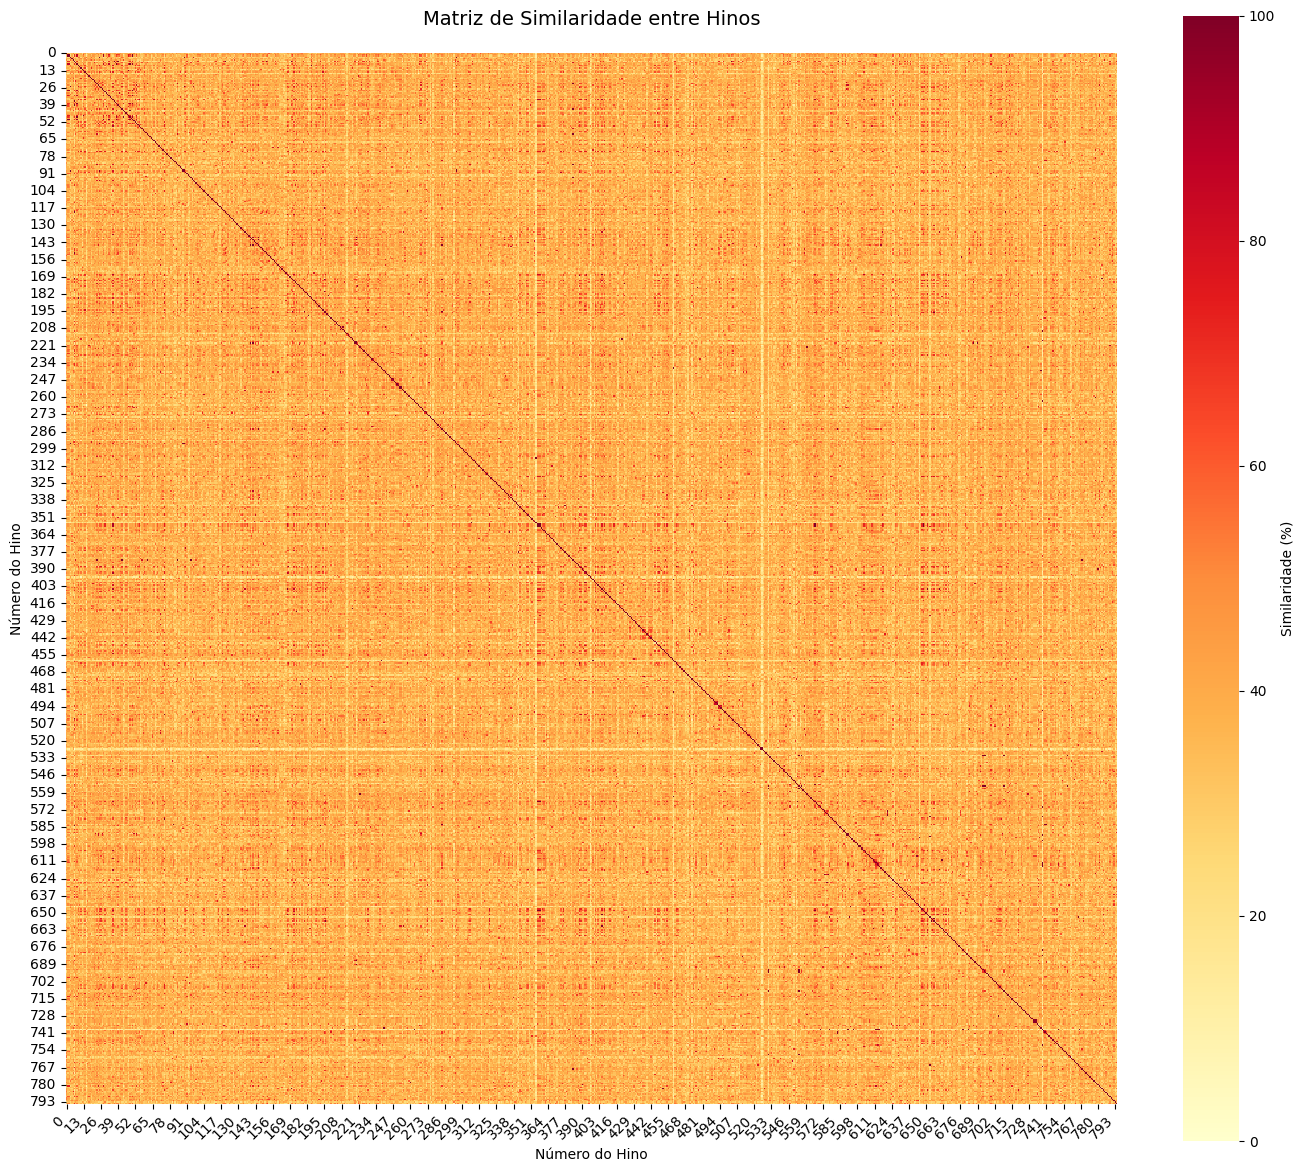

In [ ]:
# --- Heatmap da matriz de similaridade (amostra) ---
import seaborn as sns
import matplotlib.pyplot as plt

# Cria heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    df_matriz,
    cmap="YlOrRd",
    annot=False,
    fmt=".0f",
    cbar_kws={"label": "Similaridade (%)"},
    square=True
)
plt.title(f"Matriz de Similaridade entre Hinos", fontsize=14, pad=20)
plt.xlabel("Número do Hino")
plt.ylabel("Número do Hino")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Exportação de dados

In [18]:
df_matriz.to_pickle(assets_folder / "similarity_matrix_titles.pkl")